### Introduction

Project data

Read our data file

In [7]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

from pandas import Series, DataFrame
import pandas as pd

HR_df = pd.read_csv(r'/users/morgantucker/Desktop/DS/ds_proj/HRXYZ Data.csv')

HR_df


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


Cleaning some of our data

In [8]:
# drop rows with mssing values, most rows do not have NA values
HR_df.dropna(inplace=True)

# change attrition and gender to numerical
attrition_mapping = {'Yes': 1, 'No': 0}
gender_mapping = {'Male': 1, 'Female': 0}

# apply the mapping to the 'Attrition' and 'Gender' columns
HR_df['Attrition'] = HR_df['Attrition'].map(attrition_mapping)
HR_df['Gender'] = HR_df['Gender'].map(gender_mapping)

# droppping some columns that we think are not important/not variables of interest
HR_df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeID', 'EducationField'], axis=1, inplace=True)
HR_df


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,MaritalStatus,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,0,1,Healthcare Representative,Married,...,11,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,0,1,Research Scientist,Single,...,23,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,1,4,Sales Executive,Married,...,15,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,1,3,Human Resources,Married,...,11,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,1,1,Sales Executive,Single,...,12,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,Travel_Rarely,Sales,4,3,0,2,Human Resources,Single,...,18,0,6.0,2,6,1,5,3.0,4.0,3.0
4405,42,0,Travel_Rarely,Research & Development,5,4,0,1,Research Scientist,Single,...,17,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,0,Travel_Rarely,Research & Development,2,4,1,1,Laboratory Technician,Divorced,...,15,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,0,Travel_Rarely,Research & Development,25,2,1,2,Sales Executive,Married,...,20,0,5.0,4,4,1,2,1.0,3.0,3.0


Exploratory Analysis

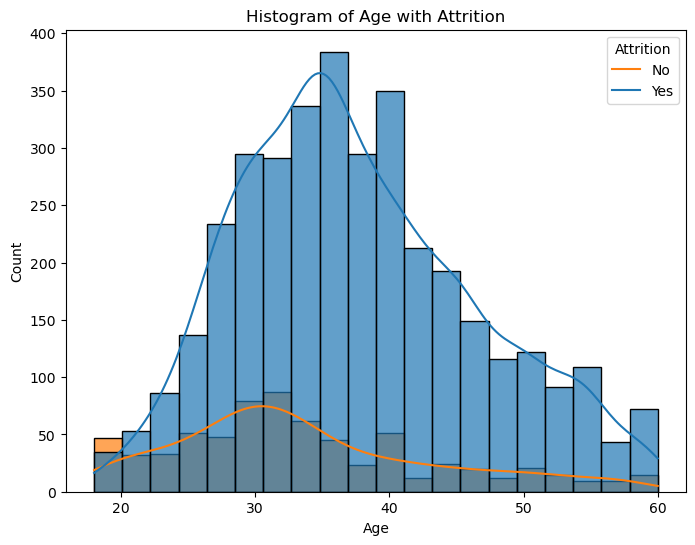

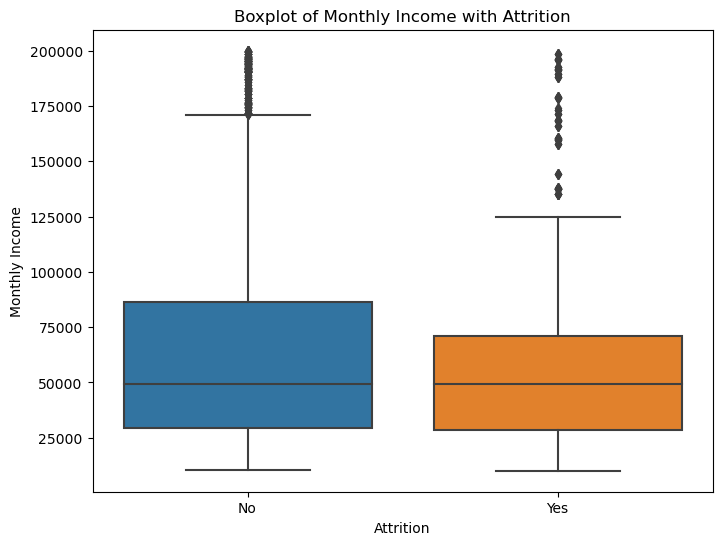

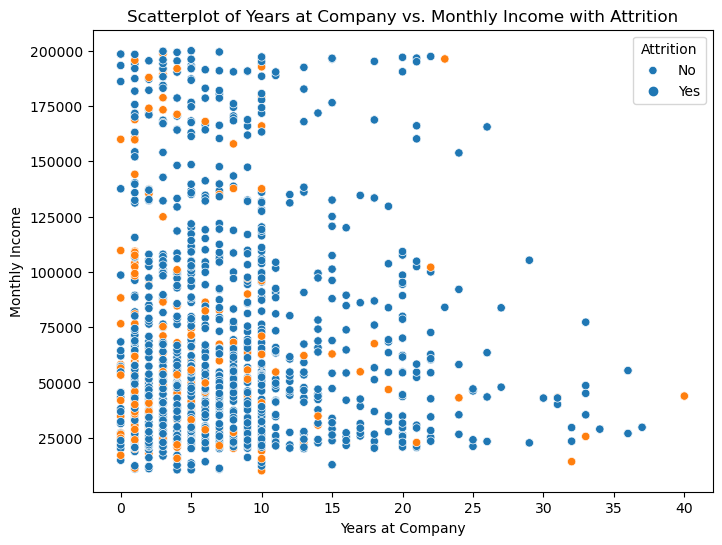

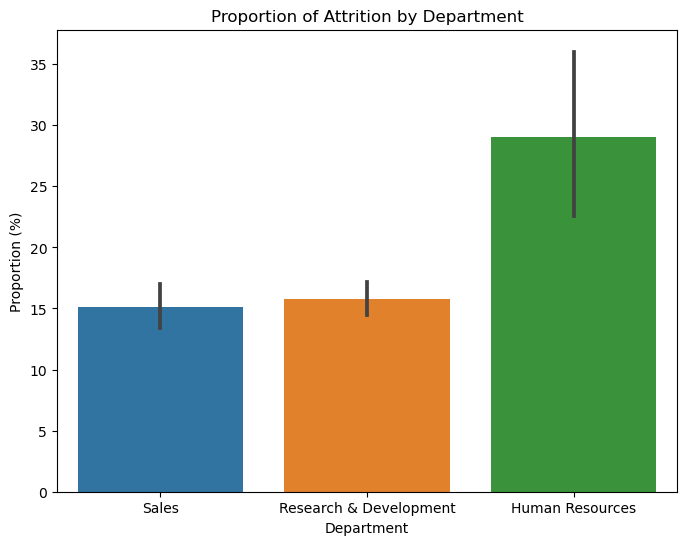

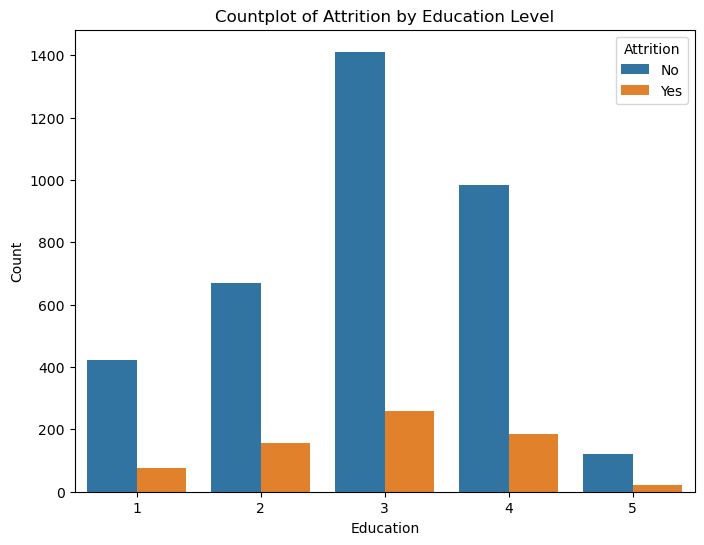

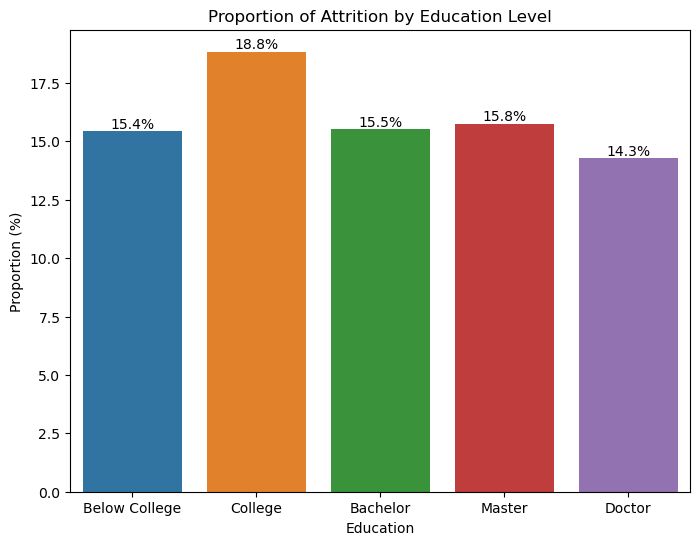

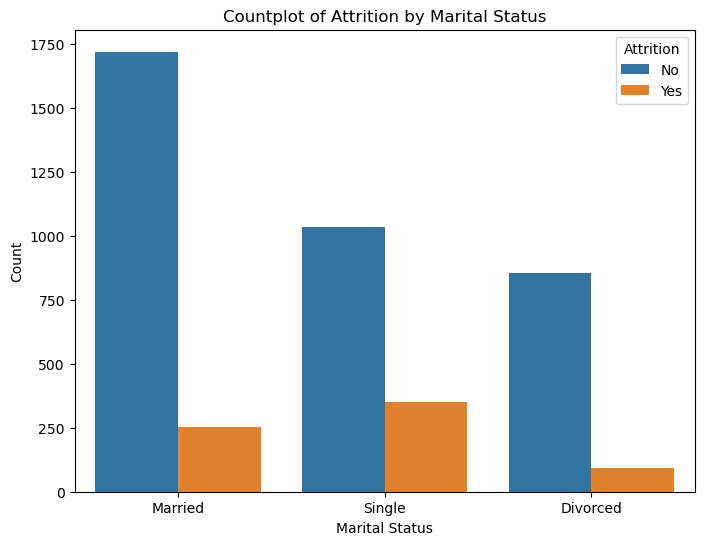

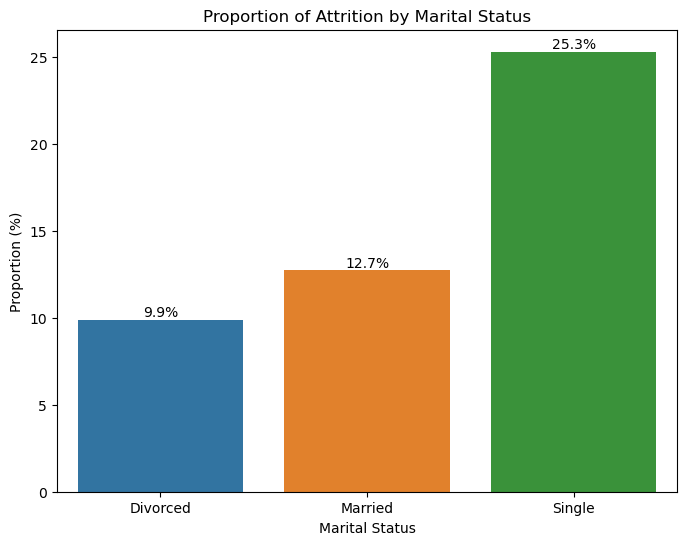

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of 'Age' with Attrition as hue
plt.figure(figsize=(8, 6))
sns.histplot(data=HR_df, x='Age', hue='Attrition', kde=True, bins=20, alpha=0.7)
plt.title('Histogram of Age with Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

# Plot boxplot of 'MonthlyIncome' with Attrition as hue
plt.figure(figsize=(8, 6))
sns.boxplot(data=HR_df, x='Attrition', y='MonthlyIncome')
plt.title('Boxplot of Monthly Income with Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Plot scatterplot of 'YearsAtCompany' vs. 'MonthlyIncome' with Attrition as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=HR_df, x='YearsAtCompany', y='MonthlyIncome', hue='Attrition')
plt.title('Scatterplot of Years at Company vs. Monthly Income with Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

# Calculate the proportion of employees with Attrition=1 for each department
proportions = HR_df.groupby('Department')['Attrition'].mean()

# Bar plot with the proportion of Attrition for each department
plt.figure(figsize=(8, 6))
sns.barplot(data=HR_df, x='Department', y='Attrition', estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Proportion of Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Proportion (%)')
plt.show()

# education level with Attrition as hue
plt.figure(figsize=(8, 6))
sns.countplot(data=HR_df, x='Education', hue='Attrition')
plt.title('Countplot of Attrition by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

proportions = HR_df.groupby('Education')['Attrition'].mean() * 100

# Define the custom education level labels
education_labels = {
    '1': 'Below College',
    '2': 'College',
    '3': 'Bachelor',
    '4': 'Master',
    '5': 'Doctor'
}

# Bar plot with the proportion of Attrition for each education level
plt.figure(figsize=(8, 6))
sns.barplot(x=proportions.index, y=proportions.values)
plt.title('Proportion of Attrition by Education Level')
plt.xlabel('Education')
plt.ylabel('Proportion (%)')

# Add custom labels on the side of the plot
for index, value in enumerate(proportions.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Set custom x-axis labels
plt.xticks(ticks=range(len(proportions)), labels=[education_labels[str(level)] for level in proportions.index])

plt.show()

# Countplot of 'MaritalStatus' with Attrition as hue
plt.figure(figsize=(8, 6))
sns.countplot(data=HR_df, x='MaritalStatus', hue='Attrition')
plt.title('Countplot of Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

# Calculate the proportion of employees with Attrition=1 for each marital status
proportions = HR_df.groupby('MaritalStatus')['Attrition'].mean() * 100

# Define the custom marital status labels
marital_labels = {
    'Single': 'Single',
    'Married': 'Married',
    'Divorced': 'Divorced'
}

# Bar plot with the proportion of Attrition for each marital status
plt.figure(figsize=(8, 6))
sns.barplot(x=proportions.index, y=proportions.values)
plt.title('Proportion of Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion (%)')

# Add custom labels on the side of the plot
for index, value in enumerate(proportions.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Set custom x-axis labels
plt.xticks(ticks=range(len(proportions)), labels=[marital_labels[status] for status in proportions.index])

plt.show()


## LOGISTIC REGRESSION

In [18]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   Gender                   4300 non-null   int64  
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  PercentSalaryHike        4300 non-null   int64  
 14  StockOptionLevel        

In [10]:
# dummies for columns w/ more than 2 categories
HR_df = pd.get_dummies(HR_df,
                       columns=['BusinessTravel', 'Department','JobRole', 'MaritalStatus'])
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   int64  
 1   Attrition                          4300 non-null   int64  
 2   DistanceFromHome                   4300 non-null   int64  
 3   Education                          4300 non-null   int64  
 4   Gender                             4300 non-null   int64  
 5   JobLevel                           4300 non-null   int64  
 6   MonthlyIncome                      4300 non-null   int64  
 7   NumCompaniesWorked                 4300 non-null   float64
 8   PercentSalaryHike                  4300 non-null   int64  
 9   StockOptionLevel                   4300 non-null   int64  
 10  TotalWorkingYears                  4300 non-null   float64
 11  TrainingTimesLastYear              4300 non-null   int64

<Axes: xlabel='Attrition', ylabel='count'>

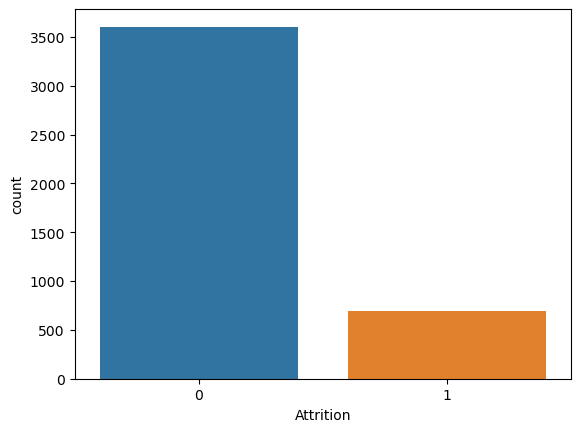

In [11]:
import seaborn as sns
sns.countplot(x='Attrition', data=HR_df) # Class imbalance

<Axes: xlabel='Attrition', ylabel='count'>

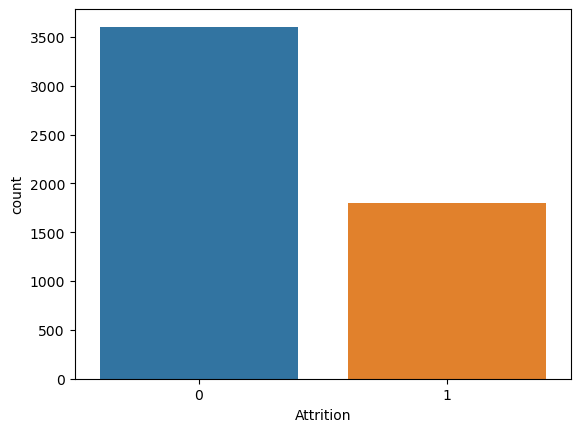

In [12]:
# Fixing the class imbalance
from imblearn.over_sampling import SMOTE

X = HR_df.drop('Attrition', axis=1)
y = HR_df['Attrition']

# Resample the data
X, y = SMOTE(sampling_strategy=0.5, random_state=0).fit_resample(X, y)
sns.countplot(x=y)

In [13]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=20, random_state=0)
X_train

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
4508,54,8,2,0,1,21516,8.426036,12,0,4.033135,...,0,0,0,0,0,1,0,0,0,0
3910,29,1,2,1,3,26780,1.000000,25,1,1.000000,...,0,0,0,0,0,1,0,0,1,0
918,55,23,1,1,5,23420,5.000000,11,2,8.000000,...,1,0,0,0,0,0,0,1,0,0
4761,47,1,3,0,2,196270,7.000000,11,2,25.000000,...,0,0,0,0,0,1,0,0,1,0
15,21,3,2,1,1,42130,1.000000,12,3,3.000000,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,35,8,4,1,2,54775,1.895119,14,0,15.762202,...,0,0,0,0,0,0,0,0,0,1
3264,42,11,1,1,2,59400,7.000000,16,0,10.000000,...,0,0,0,0,0,0,0,0,0,1
1653,48,8,1,1,2,53760,7.000000,13,1,21.000000,...,1,0,0,0,0,0,0,0,1,0
2607,41,7,2,0,1,20990,8.000000,12,1,8.000000,...,0,0,0,0,1,0,0,0,0,1


In [14]:
# Fit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

hr_lrf = LogisticRegression()
hr_lrf.fit(X_train, y_train)

# Predict on train
pred_train = hr_lrf.predict(X_train)

# Accuracy for train
acc_train = accuracy_score(y_train, pred_train)
print("Accuracy Score:", acc_train*100, "%")

# Predict on test
pred_test = hr_lrf.predict(X_test)

# Accuracy for test
acc_test = accuracy_score(y_test, pred_test)
print("Accuracy Score:", acc_test*100, "%")

#Similar scores of accuracy between both the train and test sets.

Accuracy Score: 69.01800631149062 %
Accuracy Score: 70.0 %


### Optimization: Checking for multicollinearity, scaling/normalization, feature selection, & gradient descent

<Axes: >

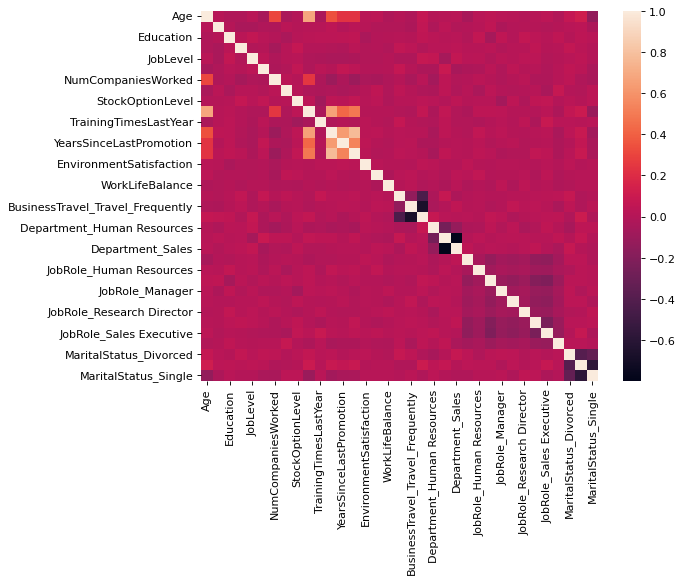

In [15]:
# Check for multicollinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
features_corr = pd.DataFrame(X_train).corr()
sns.heatmap(features_corr)

In [18]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr_matrix = features_corr.corr()

# Find highly correlated feature pairs
high_corr_mat = (corr_matrix.stack()
                 .reset_index(name='Correlation')
                 .rename(columns={'level_0': 'feature1', 'level_1': 'feature2'})
                 .query('feature1 < feature2 and abs(Correlation) > 0.8'))

# Round correlation values
high_corr_mat['Correlation'] = high_corr_mat['Correlation'].round(2)

print(high_corr_mat)

                              feature1                      feature2  \
9                                  Age             TotalWorkingYears   
326                  TotalWorkingYears                YearsAtCompany   
397                     YearsAtCompany       YearsSinceLastPromotion   
398                     YearsAtCompany          YearsWithCurrManager   
433            YearsSinceLastPromotion          YearsWithCurrManager   
649   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely   
757  Department_Research & Development              Department_Sales   

     Correlation  
9           0.89  
326         0.86  
397         0.90  
398         0.96  
433         0.87  
649        -0.82  
757        -0.93  


In [17]:
# drop some of the highly correlated features
features_index = ['TotalWorkingYears', 'YearsWithCurrManager']
X_test = X_test.drop(features_index,axis=1)
X_train = X_train.drop(features_index,axis=1)

In [19]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'Education', 'Gender', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [20]:
# scaling/normalization
from sklearn.preprocessing import normalize

scaler_cols = [ 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany', 
               'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

Scaled_train = X_train.copy()
Scaled_test = X_test.copy()

Scaled_train[scaler_cols] = normalize(X_train[scaler_cols], norm='max')
Scaled_test[scaler_cols] = normalize(X_test[scaler_cols], norm='max')

Scaled_train

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
4508,0.002510,0.000372,0.000093,0,0.000046,1.0,0.000392,12,0.000000,0.000093,...,0,0,0,0,0,1,0,0,0,0
3910,0.001083,0.000037,0.000075,1,0.000112,1.0,0.000037,25,0.000037,0.000112,...,0,0,0,0,0,1,0,0,1,0
918,0.002348,0.000982,0.000043,1,0.000213,1.0,0.000213,11,0.000085,0.000085,...,1,0,0,0,0,0,0,1,0,0
4761,0.000239,0.000005,0.000015,0,0.000010,1.0,0.000036,11,0.000010,0.000005,...,0,0,0,0,0,1,0,0,1,0
15,0.000498,0.000071,0.000047,1,0.000024,1.0,0.000024,12,0.000071,0.000071,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.000639,0.000146,0.000073,1,0.000037,1.0,0.000035,14,0.000000,0.000055,...,0,0,0,0,0,0,0,0,0,1
3264,0.000707,0.000185,0.000017,1,0.000034,1.0,0.000118,16,0.000000,0.000034,...,0,0,0,0,0,0,0,0,0,1
1653,0.000893,0.000149,0.000019,1,0.000037,1.0,0.000130,13,0.000019,0.000056,...,1,0,0,0,0,0,0,0,1,0
2607,0.001953,0.000333,0.000095,0,0.000048,1.0,0.000381,12,0.000048,0.000095,...,0,0,0,0,1,0,0,0,0,1


In [21]:
hr_lrf2 = LogisticRegression(max_iter=1000)
hr_lrf2.fit(Scaled_train, y_train)

# Predict on train
pred_train2 = hr_lrf2.predict(Scaled_train)

# Accuracy for train
acc_train2 = accuracy_score(y_train, pred_train2)
print("Accuracy Score:", acc_train2*100, "%")

# Predict on test
pred_test2 = hr_lrf2.predict(Scaled_test)

# Accuracy for test
acc_test2 = accuracy_score(y_test, pred_test2)
print("Accuracy Score:", acc_test2*100, "%")

Accuracy Score: 78.7080007425283 %
Accuracy Score: 75.0 %


In [26]:
# Feature selection

# Create a logistic regression model with L1 (Lasso) regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)

# Fit the model on the scaled data
lasso_model.fit(Scaled_train, y_train)

# Get the coefficients and extract non-zero coefficients
coefficients = lasso_model.coef_
selected_features_indices = np.nonzero(coefficients)[1]

# Extract the selected features from the scaled data
selected_features_train = Scaled_train.iloc[:, selected_features_indices]
selected_features_test = Scaled_test.iloc[:, selected_features_indices]

# Fit the model again using only the selected features
hr_lrf_lasso = LogisticRegression()
hr_lrf_lasso.fit(selected_features_train, y_train)

# Predict on train
pred_train_lasso = hr_lrf_lasso.predict(selected_features_train)

# Accuracy for train
acc_train_lasso = accuracy_score(y_train, pred_train_lasso)
print("Train Accuracy Score (with Lasso):", acc_train_lasso * 100, "%")

# Predict on test
pred_test_lasso = hr_lrf_lasso.predict(selected_features_test)

# Accuracy for test
acc_test_lasso = accuracy_score(y_test, pred_test_lasso)
print("Test Accuracy Score (with Lasso):", acc_test_lasso * 100, "%")

Train Accuracy Score (with Lasso): 78.61518470391684 %
Test Accuracy Score (with Lasso): 75.0 %


/Users/morgantucker/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Gradient descent

# Helper function to calculate the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent function for logistic regression
def gradient_descent(X, y, alpha=0.0001, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    
    for _ in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    
    return theta


# Add bias term to the feature matrix
X_train_bias = np.c_[np.ones((selected_features_train.shape[0], 1)), selected_features_train]
X_test_bias = np.c_[np.ones((selected_features_test.shape[0], 1)), selected_features_test]

# Gradient Descent to find the optimal parameters
theta_optimal = gradient_descent(X_train_bias, y_train)

# Predict on train
pred_train_gd = sigmoid(np.dot(X_train_bias, theta_optimal))
pred_train_labels = (pred_train_gd >= 0.5).astype(int)

# Accuracy for train
acc_train_gd = accuracy_score(y_train, pred_train_labels)
print("Train Accuracy Score (after Lasso and Gradient Descent):", acc_train * 100, "%")

# Predict on test
pred_test_gd = sigmoid(np.dot(X_test_bias, theta_optimal))
pred_test_labels = (pred_test_gd >= 0.5).astype(int)

# Accuracy for test
acc_test_gd = accuracy_score(y_test, pred_test_labels)
print("Test Accuracy Score (after Lasso and Gradient Descent):", acc_test * 100, "%")

Train Accuracy Score (after Lasso and Gradient Descent): 69.01800631149062 %
Test Accuracy Score (after Lasso and Gradient Descent): 70.0 %
